#**Assignment 2 - Emotion Mining**

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining



## **Importing Necessary Libraries**

In [79]:
import pandas as pd
import string
import spacy
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

## **Extracting reviews from  websites**

In [54]:
# Amazon
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
iphone_reviews=[]

### Extracting reviews from Amazon website ################
for i in range(1,10):
  ip=[]  
  url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
  iphone_reviews=iphone_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews

# writng reviews in a text file 
with open("iphone.txt","w",encoding='utf8') as output:
    output.write(str(iphone_reviews))
    

In [55]:
# Snapdeal
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews



### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

## **Text Preprocessing**

In [57]:
iphone_snapdeal

['Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera , crisp display . The battery  issue has been solved with the latest ios9 update .',
 'The 5C was delivered in a sealed box - crisp and brand new !  super deal.',
 'Good price, Great phone, very happy to own one. Recommending to everyone',
 'The OS will take around 5GB, leaving only 3 GB for your files. Unless you&aposre not a heavy files user.',
 'Very good product and delivered in time  as committed; true value for money',
 'Awesome iphone in this price range.\ni would recommend this phone',
 'Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-)',
 'Worth in this price. Excellent features. Overall performance is Good',
 'Awsme delivry on time and product recievd in good condition and i think its a awsme site for shoping',
 'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back',
 

###### **1. Removing both leading and trailing characters, and removing empty strings**

In [58]:
# remove both the leading and the trailing characters
reviews=[comment.strip() for comment in iphone_snapdeal] 
# remove empty strings, because they are considered in Python as False
reviews=[comment for comment in iphone_snapdeal if comment] 
reviews[0:10]

['Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera , crisp display . The battery  issue has been solved with the latest ios9 update .',
 'The 5C was delivered in a sealed box - crisp and brand new !  super deal.',
 'Good price, Great phone, very happy to own one. Recommending to everyone',
 'The OS will take around 5GB, leaving only 3 GB for your files. Unless you&aposre not a heavy files user.',
 'Very good product and delivered in time  as committed; true value for money',
 'Awesome iphone in this price range.\ni would recommend this phone',
 'Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-)',
 'Worth in this price. Excellent features. Overall performance is Good',
 'Awsme delivry on time and product recievd in good condition and i think its a awsme site for shoping',
 'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back']

In [59]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera , crisp display . The battery  issue has been solved with the latest ios9 update . The 5C was delivered in a sealed box - crisp and brand new !  super deal. Good price, Great phone, very happy to own one. Recommending to everyone The OS will take around 5GB, leaving only 3 GB for your files. Unless you&aposre not a heavy files user. Very good product and delivered in time  as committed; true value for money Awesome iphone in this price range.\ni would recommend this phone Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-) Worth in this price. Excellent features. Overall performance is Good Awsme delivry on time and product recievd in good condition and i think its a awsme site for shoping I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back Good Product, Do not hang. Samsung produ

###### **2. Removing punctuation from the text**

In [60]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Have switched from android to apple and i am pretty satisfied with iPhone 5c  Excellent camera  crisp display  The battery  issue has been solved with the latest ios9 update  The 5C was delivered in a sealed box  crisp and brand new   super deal Good price Great phone very happy to own one Recommending to everyone The OS will take around 5GB leaving only 3 GB for your files Unless youaposre not a heavy files user Very good product and delivered in time  as committed true value for money Awesome iphone in this price range\ni would recommend this phone Beautiful Product Original Apple Product and delivery in 2nd day\nAnd iPhone is iPhone  Worth in this price Excellent features Overall performance is Good Awsme delivry on time and product recievd in good condition and i think its a awsme site for shoping I have got ths phone in perfect condition and thank you snapdeal for perfect eliveryi guess ur are earning the trust back Good Product Do not hang Samsung products are pathetic Used Gran

 ###### **3. Text Tokenization using NLTK**

In [61]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Have', 'switched', 'from', 'android', 'to', 'apple', 'and', 'i', 'am', 'pretty', 'satisfied', 'with', 'iPhone', '5c', 'Excellent', 'camera', 'crisp', 'display', 'The', 'battery', 'issue', 'has', 'been', 'solved', 'with', 'the', 'latest', 'ios9', 'update', 'The', '5C', 'was', 'delivered', 'in', 'a', 'sealed', 'box', 'crisp', 'and', 'brand', 'new', 'super', 'deal', 'Good', 'price', 'Great', 'phone', 'very', 'happy', 'to']


1597

###### **4.Removing Stop-words from tokens**

In [62]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Have', 'switched', 'android', 'apple', 'pretty', 'satisfied', 'iPhone', '5c', 'Excellent', 'camera', 'crisp', 'display', 'battery', 'issue', 'solved', 'latest', 'ios9', 'update', '5C', 'delivered', 'sealed', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'Good', 'price', 'Great', 'phone', 'happy', 'one', 'Recommending', 'everyone', 'OS', 'take', 'around', '5GB', 'leaving', '3', 'GB', 'files', 'Unless', 'youaposre', 'heavy', 'files', 'user', 'Very', 'good', 'product', 'delivered', 'time', 'committed', 'true', 'value', 'money', 'Awesome', 'iphone', 'price', 'range', 'would', 'recommend', 'phone', 'Beautiful', 'Product', 'Original', 'Apple', 'Product', 'delivery', '2nd', 'day', 'And', 'iPhone', 'iPhone', 'Worth', 'price', 'Excellent', 'features', 'Overall', 'performance', 'Good', 'Awsme', 'delivry', 'time', 'product', 'recievd', 'good', 'condition', 'think', 'awsme', 'site', 'shoping', 'got', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 

## **Text Normalization**

In [63]:

lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['have', 'switched', 'android', 'apple', 'pretty', 'satisfied', 'iphone', '5c', 'excellent', 'camera', 'crisp', 'display', 'battery', 'issue', 'solved', 'latest', 'ios9', 'update', '5c', 'delivered', 'sealed', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'good', 'price', 'great', 'phone', 'happy', 'one', 'recommending', 'everyone', 'os', 'take', 'around', '5gb', 'leaving', '3', 'gb', 'files', 'unless', 'youaposre', 'heavy', 'files', 'user', 'very', 'good', 'product', 'delivered', 'time', 'committed', 'true', 'value', 'money', 'awesome', 'iphone', 'price', 'range', 'would', 'recommend', 'phone', 'beautiful', 'product', 'original', 'apple', 'product', 'delivery', '2nd', 'day', 'and', 'iphone', 'iphone', 'worth', 'price', 'excellent', 'features', 'overall', 'performance', 'good', 'awsme', 'delivry', 'time', 'product', 'recievd', 'good', 'condition', 'think', 'awsme', 'site', 'shoping', 'got', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 

## **Stemming**

In [64]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['have', 'switch', 'android', 'appl', 'pretti', 'satisfi', 'iphon', '5c', 'excel', 'camera', 'crisp', 'display', 'batteri', 'issu', 'solv', 'latest', 'ios9', 'updat', '5c', 'deliv', 'seal', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'good', 'price', 'great', 'phone', 'happi', 'one', 'recommend', 'everyon', 'os', 'take', 'around', '5gb', 'leav', '3', 'gb', 'file', 'unless', 'youaposr', 'heavi', 'file', 'user', 'veri', 'good', 'product', 'deliv', 'time', 'commit', 'true', 'valu', 'money', 'awesom', 'iphon', 'price', 'rang', 'would', 'recommend', 'phone', 'beauti', 'product', 'origin', 'appl', 'product', 'deliveri', '2nd', 'day', 'and', 'iphon', 'iphon', 'worth', 'price', 'excel', 'featur', 'overal', 'perform', 'good', 'awsm', 'delivri', 'time', 'product', 'recievd', 'good', 'condit', 'think', 'awsm', 'site', 'shope', 'got', 'th', 'phone', 'perfect', 'condit', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earn', 'trust', 'back', 'good', 'product', 'do', 'hang', 'samsun

## **Lemmatization**

In [65]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['have', 'switch', 'android', 'apple', 'pretty', 'satisfied', 'iphone', '5c', 'excellent', 'camera', 'crisp', 'display', 'battery', 'issue', 'solve', 'late', 'ios9', 'update', '5c', 'deliver', 'seal', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'good', 'price', 'great', 'phone', 'happy', 'one', 'recommend', 'everyone', 'os', 'take', 'around', '5', 'gb', 'leave', '3', 'gb', 'file', 'unless', 'youaposre', 'heavy', 'file', 'user', 'very', 'good', 'product', 'deliver', 'time', 'commit', 'true', 'value', 'money', 'awesome', 'iphone', 'price', 'range', 'would', 'recommend', 'phone', 'beautiful', 'product', 'original', 'apple', 'product', 'delivery', '2nd', 'day', 'and', 'iphone', 'iphone', 'worth', 'price', 'excellent', 'feature', 'overall', 'performance', 'good', 'awsme', 'delivry', 'time', 'product', 'recievd', 'good', 'condition', 'think', 'awsme', 'site', 'shop', 'get', 'ths', 'phone', 'perfect', 'condition', 'thank', 'snapdeal', 'perfect', 'eliveryi', 'guess', 'ur', 'earn', 'trust'

## **Feature Extraction**

#### **1. CountVectorizer**

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [67]:
print(cv.vocabulary_)

{'have': 153, 'switch': 341, 'android': 25, 'apple': 28, 'pretty': 247, 'satisfied': 292, 'iphone': 172, '5c': 8, 'excellent': 119, 'camera': 56, 'crisp': 85, 'display': 102, 'battery': 38, 'issue': 175, 'solve': 327, 'late': 181, 'ios9': 171, 'update': 371, 'deliver': 95, 'seal': 298, 'box': 47, 'brand': 48, 'new': 213, 'super': 337, 'deal': 91, 'good': 143, 'price': 249, 'great': 147, 'phone': 237, 'happy': 151, 'one': 219, 'recommend': 282, 'everyone': 117, 'os': 226, 'take': 342, 'around': 29, 'gb': 138, 'leave': 182, 'file': 127, 'unless': 370, 'youaposre': 396, 'heavy': 157, 'user': 376, 'very': 379, 'product': 256, 'time': 357, 'commit': 71, 'true': 366, 'value': 377, 'money': 203, 'awesome': 33, 'range': 273, 'would': 394, 'beautiful': 41, 'original': 225, 'delivery': 96, '2nd': 7, 'day': 90, 'and': 23, 'worth': 393, 'feature': 125, 'overall': 228, 'performance': 236, 'awsme': 35, 'delivry': 97, 'recievd': 281, 'condition': 75, 'think': 350, 'site': 318, 'shop': 309, 'get': 140

In [68]:
print(cv.get_feature_names()[150:300])

['hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heated', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'iaposm', 'in', 'initially', 'inter', 'interaction', 'interest', 'ios', 'ios9', 'iphone', 'iphone5c', 'iphoneearlier', 'issue', 'itaposs', 'item', 'job', 'lack', 'lag', 'late', 'leave', 'level', 'like', 'limit', 'list', 'little', 'look', 'lovely', 'loving', 'low', 'make', 'manufacturer', 'mark', 'marvallous', 'may', 'mean', 'member', 'memory', 'metal', 'mobile', 'model', 'money', 'month', 'much', 'mush', 'must', 'nd', 'near', 'nee', 'need', 'net', 'new', 'nice', 'not', 'nt', 'nxt', 'offer', 'one', 'online', 'only', 'oparating', 'open', 'order', 'original', 'os', 'other', 'overall', 'pack', 'part', 'pathetic', 'pay', 'perfect', 'perfectly', 'perform', 'performance', 'phone', 'phoneaposs', 'phoneever', 'phonegood', 'picture', 'piece', 'plastic', 'plastuc', 'prefer', 'premium', 'pretty', 'previous', 'price', 'priceat', 'prior', 'prize', 'pro', 'problem'

In [69]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
print(reviewscv.toarray().shape)

(1028, 397)


#### **CountVectorizer using N-Grams**

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
bow_matrix_ngram=cv_ngram_range.fit_transform(reviews)
print(cv_ngram_range.get_feature_names())

['10 days', '5c snapdeal', 'also good', 'apple product', 'best deal', 'best phone', 'body looks', 'bought iphone', 'bought iphone 5c', 'brand new', 'cons plastic', 'cons plastic body', 'delivered time', 'delivered within', 'excellent product', 'fast shipping', 'genuine product', 'good condition', 'good phone', 'good price', 'good price great', 'good product', 'good service', 'got delivered', 'got delivered time', 'happy product', 'ios cons', 'iphone 5c', 'iphone 5c snapdeal', 'latest ios', 'new iphone', 'nice phone', 'perfect condition', 'phone aposs', 'phone good', 'phone looks', 'phone price', 'plastic body', 'plastic body looks', 'premium good', 'premium good plastuc', 'pretty satisfied', 'pretty satisfied iphone', 'previous reviews', 'previous reviews snapdeal', 'price also', 'price also low', 'price category', 'price category manufacturers', 'price delivery', 'price delivery fast', 'price delivery service', 'price excellent', 'price excellent features', 'price first', 'price first

In [73]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### **2. TfidfVectorizer**

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(reviews)
print(tfidfv_ngram_max_features.get_feature_names())

['10 days', '5c snapdeal', 'also good', 'apple product', 'best deal', 'best phone', 'body looks', 'bought iphone', 'bought iphone 5c', 'brand new', 'cons plastic', 'cons plastic body', 'delivered time', 'delivered within', 'excellent product', 'fast shipping', 'genuine product', 'good condition', 'good phone', 'good price', 'good price great', 'good product', 'good service', 'got delivered', 'got delivered time', 'happy product', 'ios cons', 'iphone 5c', 'iphone 5c snapdeal', 'latest ios', 'new iphone', 'nice phone', 'perfect condition', 'phone aposs', 'phone good', 'phone looks', 'phone price', 'plastic body', 'plastic body looks', 'premium good', 'premium good plastuc', 'pretty satisfied', 'pretty satisfied iphone', 'previous reviews', 'previous reviews snapdeal', 'price also', 'price also low', 'price category', 'price category manufacturers', 'price delivery', 'price delivery fast', 'price delivery service', 'price excellent', 'price excellent features', 'price first', 'price first

In [75]:
print(tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## **Word Cloud**

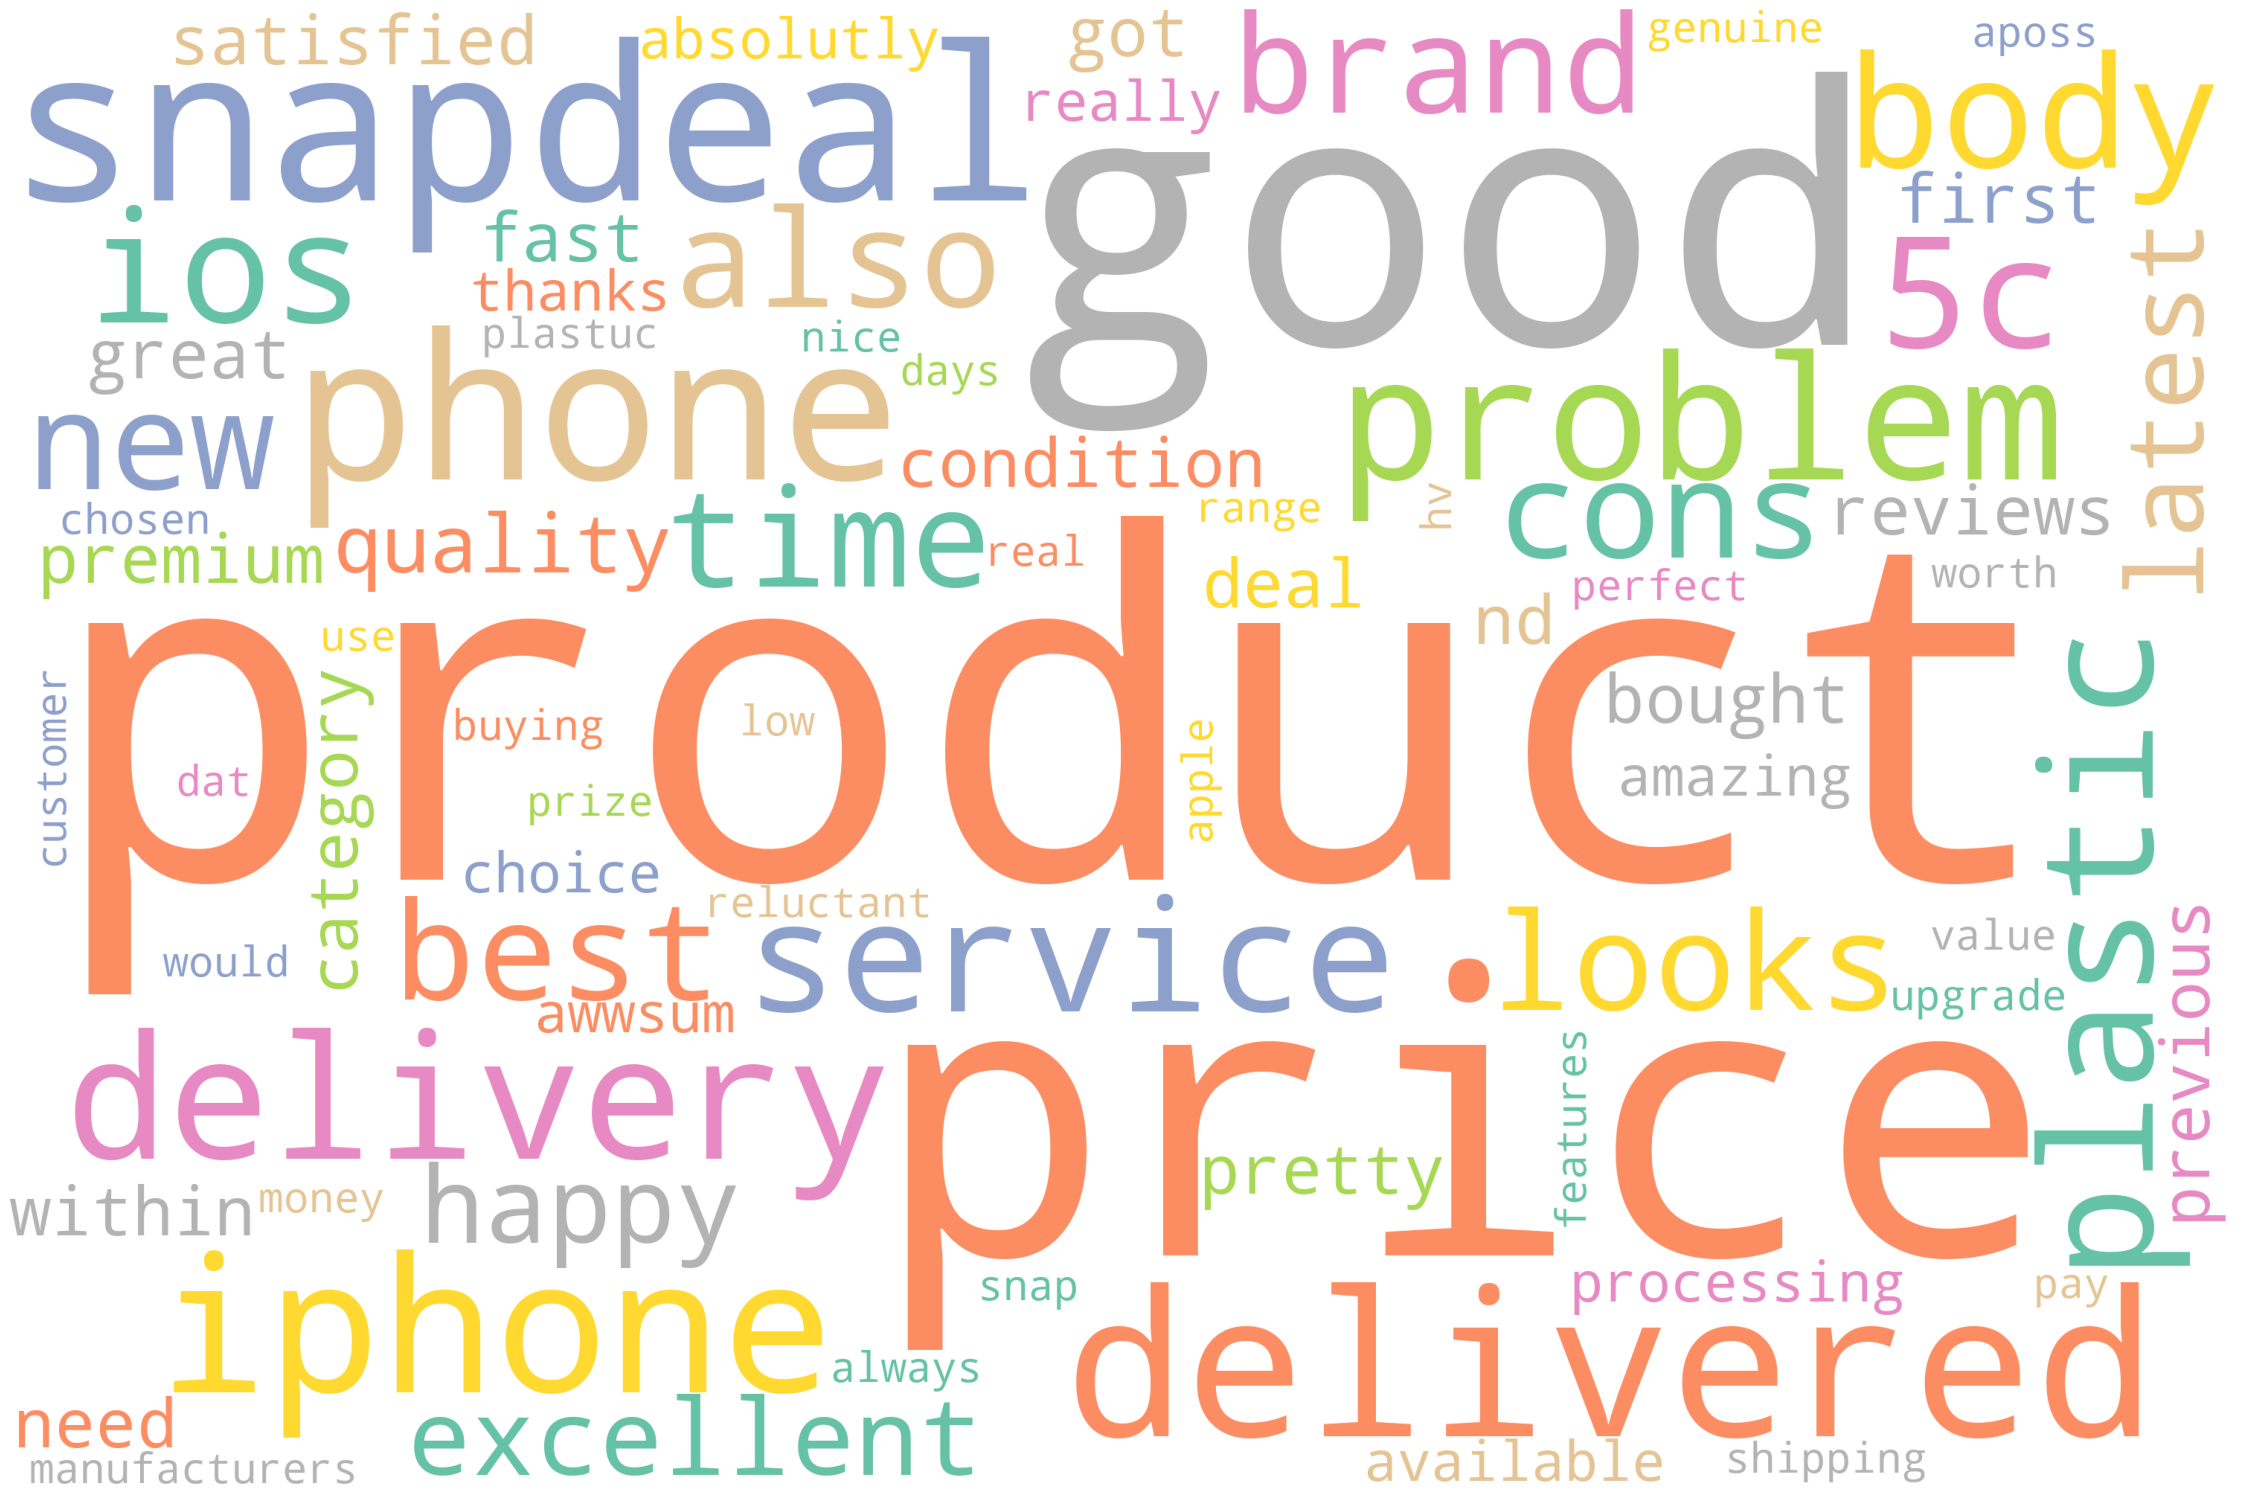

In [76]:
clean_reviews2=' '.join(tfidfv_ngram_max_features.get_feature_names())
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_reviews2)
plot_cloud(wordcloud)

## **Emotion Mining**

In [77]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['Have switched from android to apple and i am pretty satisfied with iPhone 5c .',
 'Excellent camera , crisp display .',
 'The battery  issue has been solved with the latest ios9 update .',
 'The 5C was delivered in a sealed box - crisp and brand new !',
 'super deal.',
 'Good price, Great phone, very happy to own one.',
 'Recommending to everyone The OS will take around 5GB, leaving only 3 GB for your files.',
 'Unless you&aposre not a heavy files user.',
 'Very good product and delivered in time  as committed; true value for money Awesome iphone in this price range.',
 'i would recommend this phone Beautiful Product.',
 'Original Apple Product and delivery in 2nd day.',
 'And iPhone is iPhone ;-) Worth in this price.',
 'Excellent features.',
 'Overall performance is Good Awsme delivry on time and product recievd in good condition and i think its a awsme site for shoping I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the t

In [80]:
sent_df=pd.DataFrame(sentences,columns=['Comments'])
sent_df

,Comments
0,Have switched from android to apple and i am p...
1,"Excellent camera , crisp display ."
2,The battery issue has been solved with the la...
3,The 5C was delivered in a sealed box - crisp a...
4,super deal.
...,...
121,Got delivered on time!
122,Good buy at an affordable price during the sale.
123,"It&aposs cool phone, good processing with late..."
124,The cons are: Low memory space.


In [81]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [82]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [83]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [84]:
# manual testing
calculate_sentiment(text='great')

3

In [86]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['Comments'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      3
1      3
2      1
3      0
4      3
      ..
121    0
122    3
123    4
124    0
125    0
Name: sentiment_value, Length: 126, dtype: int64

In [88]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['Comments'].str.split().apply(len)
sent_df['word_count']

0      15
1       6
2      12
3      14
4       2
       ..
121     4
122     9
123     8
124     6
125    21
Name: word_count, Length: 126, dtype: int64

In [89]:
sent_df.sort_values(by='sentiment_value')

,Comments,sentiment_value,word_count
87,But those all reviews are fake and just to dam...,-6,14
71,Dere is only one problem nd dat is space... Bt...,-4,20
82,Dont buy on fraudulent schemes.,-4,5
17,Only problem is you need to pay for everything.,-3,9
14,Samsung products are pathetic.,-2,4
...,...,...,...
109,Recommended***** Pros : Picture quality is awe...,14,39
97,"good as like iphone, apple , and snapdeal ser...",15,17
26,Good phone THE PROMPTNESS IN DELIVERY AND THE ...,15,35
116,It is worth a Shot i bought iphone 5c from sna...,19,65


In [90]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    126.000000
mean       2.849206
std        4.313824
min       -6.000000
25%        0.000000
50%        2.000000
75%        3.750000
max       21.000000
Name: sentiment_value, dtype: float64

In [91]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,Comments,sentiment_value,word_count
3,The 5C was delivered in a sealed box - crisp a...,0,14
7,Unless you&aposre not a heavy files user.,0,7
10,Original Apple Product and delivery in 2nd day.,0,8
14,Samsung products are pathetic.,-2,4
15,Used Grand Qauttro which use to take 20-30 sec...,0,14
16,Apple is quality product.,0,4
17,Only problem is you need to pay for everything.,-3,9
31,"So, thought of going for iPhone.",0,6
32,"Though, I didnt want to go for iPhone 6S as it...",-1,16
33,"So, decided that I will buy iPhone 5C.",0,8


In [92]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,Comments,sentiment_value,word_count
0,Have switched from android to apple and i am p...,3,15
1,"Excellent camera , crisp display .",3,6
2,The battery issue has been solved with the la...,1,12
4,super deal.,3,2
5,"Good price, Great phone, very happy to own one.",9,9
...,...,...,...
118,I am fully satisfied with this product.,2,7
119,Features are good....but the phone gets heated...,12,39
120,my wife wanted to try an iphone and she is lov...,6,31
122,Good buy at an affordable price during the sale.,3,9


In [93]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,Comments,sentiment_value,word_count,index
0,Have switched from android to apple and i am p...,3,15,0
1,"Excellent camera , crisp display .",3,6,1
2,The battery issue has been solved with the la...,1,12,2
3,The 5C was delivered in a sealed box - crisp a...,0,14,3
4,super deal.,3,2,4
...,...,...,...,...
121,Got delivered on time!,0,4,121
122,Good buy at an affordable price during the sale.,3,9,122
123,"It&aposs cool phone, good processing with late...",4,8,123
124,The cons are: Low memory space.,0,6,124


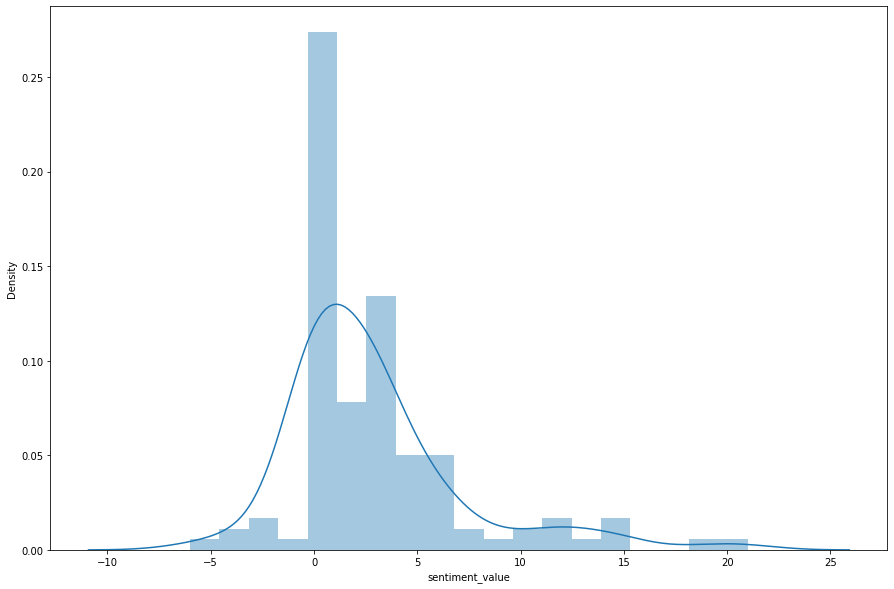

In [95]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])
plt.show()

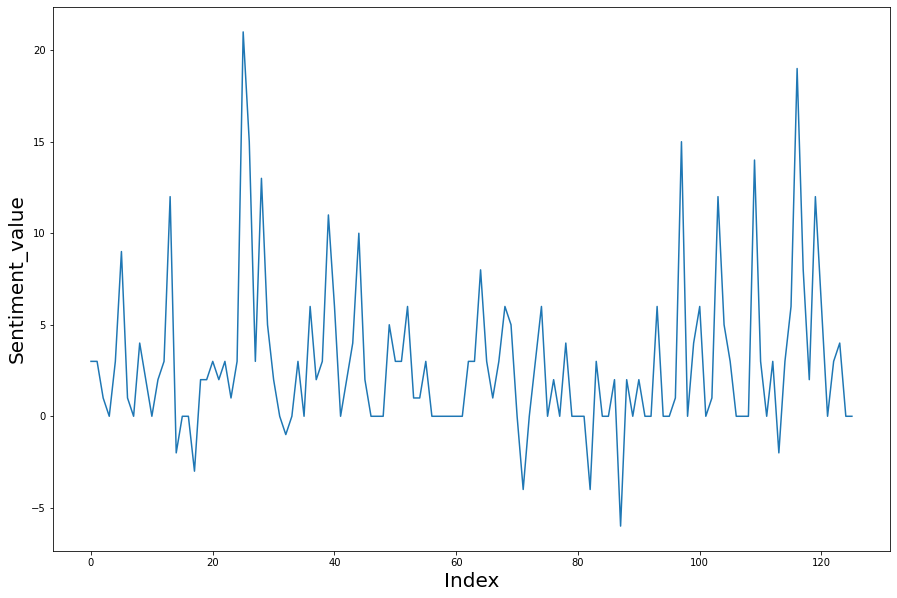

In [100]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)
plt.xlabel('Index',size = 20)
plt.ylabel('Sentiment_value',size = 20)
plt.show()

**Observation:**
  From the above line plot we can see that Majority of reviews are Positive, eventhough some negative reviews are present